In [402]:
%pylab inline
import seaborn as sns
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


# Rastrigin

In [124]:
def rastrigin(*X):
  return 10 * len(X) + np.sum([(np.square(x) - 10 * np.cos(2 * np.pi * x)) for x in X], axis=0)

def get_rastrigin(X):
  X = (np.array(X[0]), np.array(X[1]))
  
  return 10 * len(X) + np.sum([(np.square(x) - 10 * np.cos(2 * np.pi * x)) for x in X], axis=0)

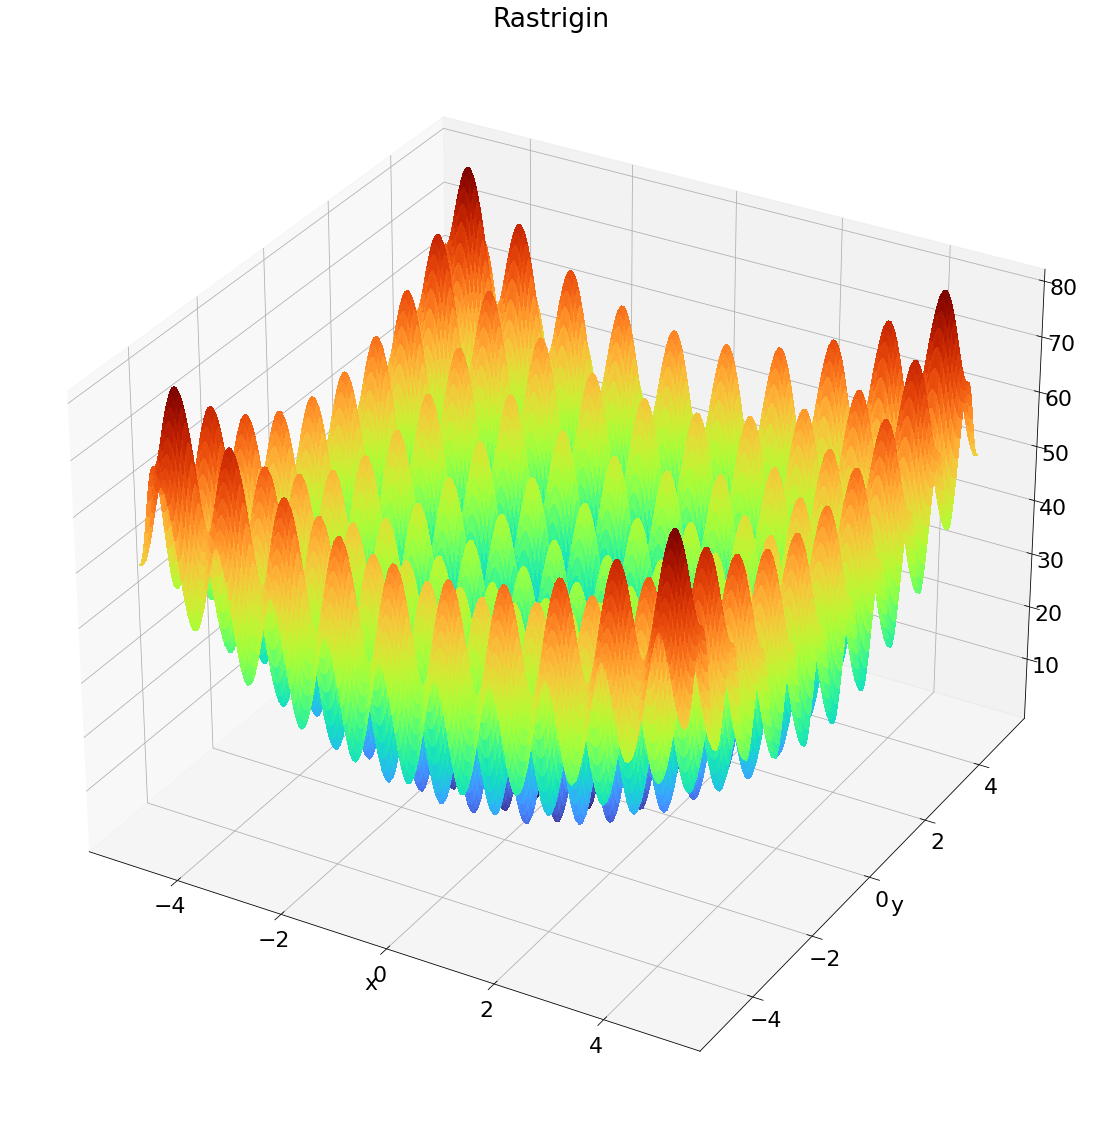

In [75]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)

x, y = np.meshgrid(x, y)

z = rastrigin(x, y)

# plotting

# configs
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
fig.set_size_inches(20, 20)

ax = fig.add_subplot(projection='3d')

ax.set_title('Rastrigin')
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.array([[0.15971516, 2.73072177, -0.73116482]])
yy = np.array([[-3.04770558, -2.48578925, -3.65409909]])
zz = np.array([[10, 20, 60]])

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.turbo, linewidth=1, antialiased=False)

# ax.scatter3D(xx, yy, zz, marker='X', color='k')
# ax.scatter(xx, yy, zz, rstride=1, cstride=1, cmap=cm.Greys, linewidth=1, antialiased=False)

plt.show()

# Rosenbrock

In [598]:
def rosenbrock(x, y, a=1, b=100):
  return np.square(a - x) + (b * np.square(y - np.square(x)))

def get_rosenbrock(X, a=1, b=100):
  x, y = np.array(X[0]), np.array(X[1])
  
  return np.square(a - x) + (b * np.square(y - np.square(x)))

In [ ]:
def rosenbrock_grad(X, a=1, b=100):
    x, y = X
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

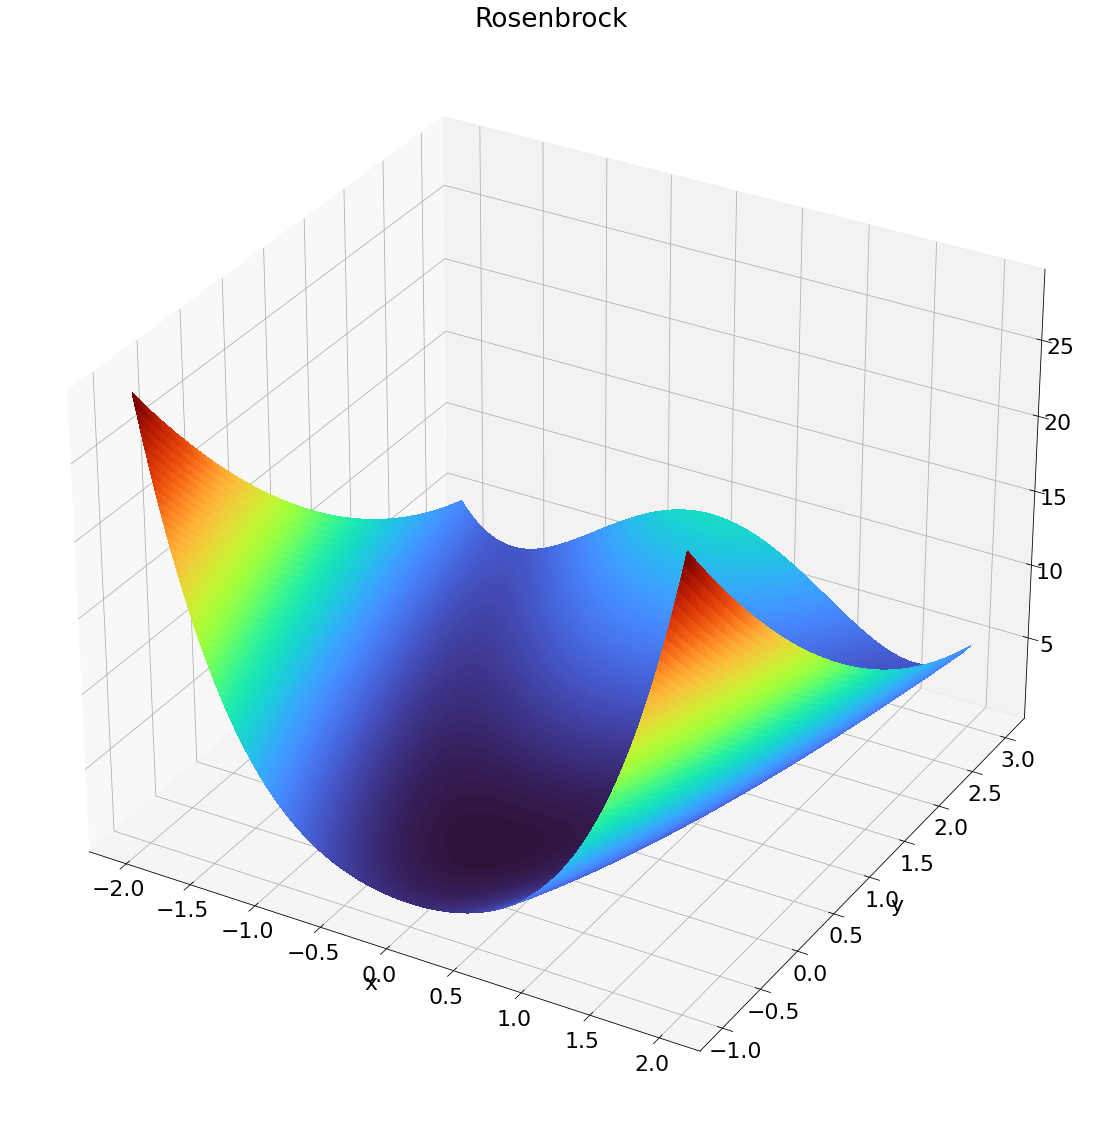

In [507]:
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)

x, y = np.meshgrid(x, y)

# print(x)
# print(y)

z = rosenbrock(x, y)

# plotting

# configs
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
fig.set_size_inches(20, 20)

ax = fig.add_subplot(projection='3d')

ax.set_title('Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.turbo, linewidth=0, antialiased=False)

plt.show()

# Particle Swarm Optimization

### Swarm size 10 - first trial

In [584]:
SWARM_SIZE = 20

# initial position

current_pos = np.random.uniform(-4, 4, (SWARM_SIZE, 2))

# set particles best position to initial position

best_pos = current_pos.copy()
best_pos

current_pos, best_pos

(array([[ 2.90787617,  1.63330335],
        [ 3.09956146,  2.52641827],
        [ 3.04355698,  3.09443211],
        [ 2.24771252,  3.87269404],
        [-3.79548804, -3.04366646],
        [-2.02982592,  1.8675515 ],
        [-2.84574369,  0.70473787],
        [-2.7278053 ,  1.35647332],
        [-0.64692155,  1.86696655],
        [-2.90741466,  3.77384754],
        [ 1.70378293,  3.59166019],
        [-3.96655118, -3.35478376],
        [ 3.17098842, -1.39563508],
        [-2.04424098,  2.81725556],
        [ 2.36372127,  1.84312998],
        [ 2.92991318, -0.05344571],
        [ 0.49382531, -2.66949382],
        [-3.72033017,  1.05814495],
        [ 3.44405657,  3.08406516],
        [-3.79646684,  1.86746466]]),
 array([[ 2.90787617,  1.63330335],
        [ 3.09956146,  2.52641827],
        [ 3.04355698,  3.09443211],
        [ 2.24771252,  3.87269404],
        [-3.79548804, -3.04366646],
        [-2.02982592,  1.8675515 ],
        [-2.84574369,  0.70473787],
        [-2.7278053 ,  1.3

In [498]:
# debug

all_values = [get_rosenbrock(x) for x in best_pos]
all_values

[1439.7944753142906,
 1264.4502639324573,
 50.995678404509846,
 423.2305839713513,
 2551.77707671513,
 504.29972924294583,
 1.261952456844984,
 311.71525324716646,
 4081.106701559603,
 15016.319318146316,
 528.6485851479677,
 2118.466621287158,
 258.22222199554636,
 8072.787058659163,
 7986.0650079068455,
 150.65991458283378,
 528.129881650511,
 11122.126723552827,
 21519.666889556807,
 8529.76290519998]

In [499]:
# initialize swarm's best position

swarm_best_pos = best_pos[0]
swarm_best_val = get_rosenbrock(swarm_best_pos)

for i in range(SWARM_SIZE):
  if (current_val := get_rosenbrock(current_pos[i])) < swarm_best_val:
    swarm_best_val = current_val
    swarm_best_pos = current_pos[i]
    print("Updated best position: {} for particle {} with value {}".format(swarm_best_pos, i, swarm_best_val))
    
print("Best value: {}, coordinates: {}".format(swarm_best_val, swarm_best_pos))

Updated best position: [-2.46750239  2.54960395] for particle 1 with value 1264.4502639324573
Updated best position: [-0.71846443  1.20931853] for particle 2 with value 50.995678404509846
Updated best position: [0.34682728 0.21168488] for particle 6 with value 1.261952456844984
Best value: 1.261952456844984, coordinates: [0.34682728 0.21168488]


In [500]:
# initialize initial velocity of particles

current_vel = np.random.uniform(-1, 1, (SWARM_SIZE, 2))
current_vel

array([[ 0.26707341, -0.88780683],
       [ 0.88840436, -0.40509543],
       [ 0.67695599, -0.80052276],
       [-0.93491572,  0.38516963],
       [ 0.74815324, -0.09825421],
       [ 0.17647748,  0.94979598],
       [ 0.44623431,  0.28522584],
       [ 0.23718841, -0.25608988],
       [-0.86659479,  0.00885005],
       [ 0.43439131,  0.58367639],
       [ 0.99965059,  0.83398034],
       [-0.44500382, -0.82416313],
       [ 0.07365204, -0.19614135],
       [ 0.38080835, -0.55901628],
       [-0.12059349,  0.86474916],
       [-0.25098025, -0.74052381],
       [ 0.969097  , -0.3399513 ],
       [-0.94189665,  0.9423207 ],
       [-0.52913096, -0.77635121],
       [ 0.10669497, -0.64666405]])

In [509]:
%%time

# generation iterations
GENS = 2000

# LEARNING CONSTANTS (b and c called beta, gamma for better variable naming)
INERTIA_WEIGHT = 0.9
BETA, GAMMA = np.random.rand(2)

for j in tqdm(range(GENS)):
  if (j > 1000):
    INERTIA_WEIGHT = 0.4
  for i in range(SWARM_SIZE):
    for dim in range(2):
      r1, r2 = np.random.rand(2)
      
      # update particle velocity
      current_vel[i][dim] = INERTIA_WEIGHT * current_vel[i][dim] + (BETA * r1 * (best_pos[i][dim] - current_pos[i][dim])) + (GAMMA * r2 * (swarm_best_pos[dim] - current_pos[i][dim]))
      
    # update particle position
    current_pos[i] = current_pos[i] + current_vel[i]
    
    if get_rosenbrock(current_pos[i]) < get_rosenbrock(best_pos[i]):
      best_pos[i] = current_pos[i]
      if get_rosenbrock(best_pos[i]) < swarm_best_val:
        
        # update swarm's best position and value
        swarm_best_val = get_rosenbrock(best_pos[i])
        swarm_best_pos = best_pos[i]
        print("Found best swarm value {} for particle {}".format(swarm_best_val, swarm_best_pos))

print("Best value: {}, coordinates: {}".format(swarm_best_val, swarm_best_pos))

100%|██████████| 2000/2000 [00:00<00:00, 2195.64it/s]

Best value: 0.0, coordinates: [1. 1.]
CPU times: user 906 ms, sys: 15.4 ms, total: 921 ms
Wall time: 915 ms


# Gradient descent on Rosenbrock

In [801]:
def rosenbrock_grad(X, a=1, b=100):
  x, y = X
  
  return np.array([
      2 * (x - a) - 4 * b * x * (y - np.square(x)),
      2 * b * (y - np.square(x))
  ])

def get_rosenbrock(X, a=1, b=100):
  x, y = np.array(X[0]), np.array(X[1])
  
  return np.square(a - x) + (b * np.square(y - np.square(x)))

In [802]:
def gradient_descent(J_grad, x_init, alpha=0.01, epsilon=1e-10, max_iterations=1000):
    x = x_init
    function_val = []
    for i in range(max_iterations):
        x = x - alpha * J_grad(x)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
          
        function_val.append(get_rosenbrock(x))
    
    plt.plot(function_val)
    
    return x, max_iterations

x position= [0.99934527 0.99868834]
Rosenbrock value = 4.293635936143519e-07
Grad Rosenbrock(x*) = [-0.00026175 -0.0005242 ]
Iterations = 5000


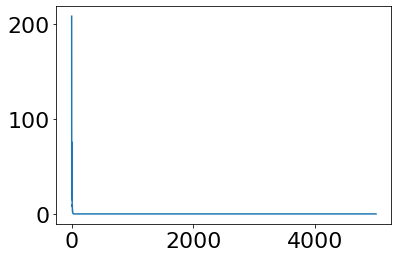

In [803]:
# initial point
x_init = [1.5, 1.5]

x_min, it = gradient_descent(rosenbrock_grad, x_init, alpha=0.002, max_iterations=5000)

print('x position=', x_min)
print('Rosenbrock value =', get_rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

# Gradient Descent in Rastrigin

*To understand why one may choose a non-derivative based optimization algorithm. Take a look at the Rastrigin benchmark function. Gradient based optimization is not well suited for optimizing functions with so many local minima.*